In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
sites = ['site' + str(i) for i in range(1,11)]
times = ['time' + str(i) for i in range(1, 11)]

In [3]:
# test_df = pd.read_csv('D:/alice/test.csv',
#                       index_col='session_id', parse_dates=['time1'])

In [4]:
df_train = pd.read_csv('D:/alice/train.csv', index_col='session_id', parse_dates=times)
df_test = pd.read_csv('D:/alice/test.csv', index_col='session_id', parse_dates=times)

In [5]:
df_train.isna().sum()

site1         0
time1         0
site2      3463
time2      3463
site3      6642
time3      6642
site4      9240
time4      9240
site5     11732
time5     11732
site6     14066
time6     14066
site7     16264
time7     16264
site8     18337
time8     18337
site9     20477
time9     20477
site10    22509
time10    22509
target        0
dtype: int64

In [6]:
print(df_test.isna().sum())

site1        0
time1        0
site2     1489
time2     1489
site3     2722
time3     2722
site4     3615
time4     3615
site5     4456
time5     4456
site6     5231
time6     5231
site7     5957
time7     5957
site8     6646
time8     6646
site9     7313
time9     7313
site10    7991
time10    7991
dtype: int64


In [7]:
df_train[sites] = df_train[sites].fillna(0).astype('int')
df_test[sites] = df_test[sites].fillna(0).astype('int')

In [8]:
# df_train[times] = df_train[times].fillna(pd.Timestamp(0))
# df_test[times] = df_test[times].fillna(pd.Timestamp(0))

In [9]:
df_test

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-04-10 11:19:53,35,2014-04-10 11:19:53,22,2014-04-10 11:19:54,321,2014-04-10 11:19:54,23,2014-04-10 11:19:54,2211,2014-04-10 11:19:54,6730,2014-04-10 11:19:54,21,2014-04-10 11:19:54,44582,2014-04-10 11:20:00,15336,2014-04-10 11:20:00
2,782,2014-03-07 11:00:28,782,2014-03-07 11:00:53,782,2014-03-07 11:00:58,782,2014-03-07 11:01:06,782,2014-03-07 11:01:09,782,2014-03-07 11:01:10,782,2014-03-07 11:01:23,782,2014-03-07 11:01:29,782,2014-03-07 11:01:30,782,2014-03-07 11:01:53
3,55,2014-05-12 15:55:12,55,2014-05-12 15:55:13,55,2014-05-12 15:55:14,55,2014-05-12 15:56:15,55,2014-05-12 15:56:16,55,2014-05-12 15:56:17,55,2014-05-12 15:56:18,55,2014-05-12 15:56:19,1445,2014-05-12 15:56:33,1445,2014-05-12 15:56:36
4,1023,2014-04-11 10:03:19,1022,2014-04-11 10:03:19,50,2014-04-11 10:03:20,222,2014-04-11 10:03:21,202,2014-04-11 10:03:21,3374,2014-04-11 10:03:22,50,2014-04-11 10:03:22,48,2014-04-11 10:03:22,48,2014-04-11 10:03:23,3374,2014-04-11 10:03:23
5,301,2014-05-16 15:05:31,301,2014-05-16 15:05:32,301,2014-05-16 15:05:33,66,2014-05-16 15:05:39,67,2014-05-16 15:05:40,69,2014-05-16 15:05:40,70,2014-05-16 15:05:40,68,2014-05-16 15:05:40,71,2014-05-16 15:05:40,167,2014-05-16 15:05:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82793,812,2014-02-10 18:20:09,1039,2014-02-10 18:20:09,676,2014-02-10 18:20:09,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT
82794,300,2014-05-26 14:16:40,302,2014-05-26 14:16:41,302,2014-05-26 14:16:44,300,2014-05-26 14:16:44,300,2014-05-26 14:17:19,1222,2014-05-26 14:17:19,302,2014-05-26 14:17:19,1218,2014-05-26 14:17:19,1221,2014-05-26 14:17:19,1216,2014-05-26 14:17:19
82795,29,2014-02-05 11:21:56,33,2014-02-05 11:21:56,35,2014-02-05 11:21:56,22,2014-02-05 11:22:03,37,2014-02-05 11:22:03,6779,2014-02-05 11:22:03,30,2014-02-05 11:22:03,21,2014-02-05 11:22:04,23,2014-02-05 11:22:04,6780,2014-02-05 11:22:04


In [10]:
with open('D:/alice/site_dic.pkl', 'rb') as input_file:
    site_dict = pickle.load(input_file)

In [11]:
list(site_dict.items())[:4]

[('www.abmecatronique.com', 25075),
 ('groups.live.com', 13997),
 ('majeureliguefootball.wordpress.com', 42436),
 ('cdt46.media.tourinsoft.eu', 30911)]

In [12]:
print('Websites total:', len(site_dict))

Websites total: 48371


In [13]:
print(df_train.shape)
print(df_test.shape)

(253561, 21)
(82797, 20)


In [14]:
site_dict

{'www.abmecatronique.com': 25075,
 'groups.live.com': 13997,
 'majeureliguefootball.wordpress.com': 42436,
 'cdt46.media.tourinsoft.eu': 30911,
 'www.hdwallpapers.eu': 8104,
 'img378.imageshack.us': 37491,
 'ecologie.nature.free.fr': 5462,
 'www.ibcn.intec.ugent.be': 35425,
 'kissanime.com': 30151,
 'www.carolineconduiteformation.com': 38268,
 'images.mystockphoto.com': 43641,
 'journalph.csphares.qc.ca': 36959,
 'www.uqo.ca': 40935,
 'd8d94e0wul1nb.cloudfront.net': 12346,
 'openapi.elong.com': 31023,
 'flamenco-o.blogspot.com': 31114,
 'www.pages-annuaire.net': 28165,
 'smart2000.pagesperso-orange.fr': 31877,
 'fast.forbes.com': 31070,
 'i1-js-14-3-01-10077-536503633-i.init.cedexis-radar.net': 12938,
 'i1-js-14-3-01-11074-716595896-i.init.cedexis-radar.net': 42002,
 'www.pacajob.com': 5671,
 'mathaa.epfl.ch': 32074,
 'cbv.sfr.bench.cedexis.com': 7104,
 'fbcdn-sphotos-b-a.akamaihd.net': 1939,
 'www.mystere-tv.com': 6708,
 'www.mon-ip.fr': 43589,
 'www.aqua-passion.com': 45241,
 'reunio

In [15]:
new_dict = {}
for key in site_dict:
    new_dict[site_dict[key]] = key

In [16]:
list(new_dict.items())[:4]

[(25075, 'www.abmecatronique.com'),
 (13997, 'groups.live.com'),
 (42436, 'majeureliguefootball.wordpress.com'),
 (30911, 'cdt46.media.tourinsoft.eu')]

In [17]:
for i in df_train[sites].iloc[:5]:
    df_train[i] = df_train[i].apply(lambda x:new_dict[x] if x!=0 else '0')

In [18]:
df_train[sites].values

array([['rr.office.microsoft.com', '0', '0', ..., '0', '0', '0'],
       ['maps.google.com', 'mts0.google.com', 'khms0.google.com', ...,
        'khms1.google.com', '193.164.197.30', '193.164.196.60'],
       ['cbk1.googleapis.com', 'accounts.google.com',
        'cbk0.googleapis.com', ..., 'cbk0.googleapis.com',
        'cbk0.googleapis.com', 'cbk0.googleapis.com'],
       ...,
       ['cran.r-project.org', 'www.stats.ox.ac.uk', 'mirror.ibcp.fr',
        ..., '0', '0', '0'],
       ['mail.google.com', 'accounts.youtube.com', 'clients2.google.com',
        ..., 'plus.google.com', 'apis.google.com', 'plus.google.com'],
       ['www.embauche.com', 'static.pagesjaunes.fr', 'www.embauche.com',
        ..., 'platform.twitter.com', 's-static.ak.facebook.com',
        'static.ak.facebook.com']], dtype=object)

In [19]:
pd.Timestamp(0)

Timestamp('1970-01-01 00:00:00')

In [20]:
# for time in df_train[times]:
#     print(df_train[time].apply(lambda x:x.year))

In [21]:
df_train['site1'].value_counts()

www.google.fr                      13874
www.google.com                      9244
annotathon.org                      7769
www.facebook.com                    5501
apis.google.com                     5434
                                   ...  
www.ecofoot.fr                         1
erycproject.files.wordpress.com        1
artspc.netmng.com                      1
grr.u-clermont1.fr                     1
www.embauche.com                       1
Name: site1, Length: 15765, dtype: int64

In [22]:
df_train[df_train['target']==1]['site1'].value_counts()

s.youtube.com                    142
i1.ytimg.com                     141
www.youtube.com                  130
www.facebook.com                  98
www.google.fr                     80
                                ... 
edge.sharethis.com                 1
www.magasins-u.com                 1
images.wikia.com                   1
d1zdqwv4o6pivl.cloudfront.net      1
www.express.co.uk                  1
Name: site1, Length: 448, dtype: int64

In [23]:
df_train[df_train['target']==0]['site1'].value_counts()

www.google.fr               13794
www.google.com               9193
annotathon.org               7769
www.facebook.com             5403
apis.google.com              5378
                            ...  
oystatic.ignimgs.com            1
www.image.ucar.edu              1
031-gmz-499.mktoresp.com        1
utbm2004.free.fr                1
www.embauche.com                1
Name: site1, Length: 15653, dtype: int64

# 5) Какой сайт в обучающей выборке является вторым по популярности в 2014 году и сколько раз его посещали в 2014 году?

In [24]:
d_t = df_train.copy()

In [25]:
d_t[times] = d_t[times].fillna(pd.Timestamp(0))
# df_test[times] = df_test[times].fillna(pd.Timestamp(0))

In [26]:
for time in d_t[times]:
    d_t[time] = d_t[time].apply(lambda x:x.year )
else:
    print('ГОТОВО')

ГОТОВО


In [27]:
dicts = []
for i in range(1,11):
    i = str(i)
    temp_dict = dict(d_t[['site' + i, 'time' + i]][d_t[['site' + i, 'time' + i]]['time'+ i ] == 2014]['site' + i].value_counts())
    dicts.append(temp_dict)
    

In [28]:
result_dict = {}.fromkeys(dicts[0].keys(), 0)
for d in dicts:
    for key in d:
        try:
            result_dict[key] += d[key]
        except:
            result_dict[key] = d[key]          

In [29]:
list(result_dict.items())[:2]

[('www.google.fr', 86090), ('annotathon.org', 77039)]

# Ответ 'annotathon.org', 77039

# 6) Сколько всего сессий обучающей выборке содержат в себе меньше чем 10 сайтов?

In [30]:
d_t[sites].sample(3)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
78301,www.google.fr,www.google.com,s1223919444.t.eloqua.com,www.candidatus.com,www.b-and-you.fr,www.candidatus.com,www.candidatus.com,www.candidatus.com,www.b-and-you.fr,www.b-and-you.fr
1530,www.google.fr,www.google.com,www.google.fr,ajax.googleapis.com,www.google.fr,www.google.fr,office14client.microsoft.com,office.microsoft.com,office.microsoft.com,rr.office.microsoft.com
135720,fr.tv.yahoo.com,fr.yahoo.com,locdrop.query.yahoo.com,farm6.staticflickr.com,farm4.staticflickr.com,farm8.staticflickr.com,fr.yahoo.com,0,0,0


In [31]:
def count_row(row):
    counter = 0
    for i in row:
        if i != '0':
            counter += 1
    return counter
    

In [32]:
sessions_count_array = d_t[sites].apply(lambda x:count_row(x),axis=1).values

In [33]:
df_train['count_sites'] = sessions_count_array

In [34]:
(sessions_count_array < 10).sum()

22509

# Элис наиболее активна в марте и неактивна летом?
# Нет

In [35]:
df_train['month'] = df_train['time1'].apply(lambda x:x.month)

In [36]:
def total_time(row):
    last_site_number = row['count_sites']
    return row['time' + str(last_site_number)] - row['time1']

In [37]:
df_train['session_time_sec'] = df_train.apply(lambda x: total_time(x).seconds, axis=1)

In [38]:
activity_target = df_train[df_train['target'] == 1][['month', 'session_time_sec', 'count_sites']]
activity_others = df_train[df_train['target'] == 0][['month', 'session_time_sec', 'count_sites']]


In [39]:
grouped_target_activity = activity_target.groupby(['month']).sum()
grouped_others_activity = activity_others.groupby(['month']).sum()

In [40]:
grouped_others_activity = (grouped_others_activity['session_time_sec'] / grouped_others_activity['count_sites'])
grouped_target_activity = (grouped_target_activity['session_time_sec'] / grouped_target_activity['count_sites'])

In [41]:
grouped_target_activity


month
1     11.923349
2      6.608824
3      3.166667
4      4.908671
11     6.210360
12     4.251978
dtype: float64

In [42]:
grouped_others_activity

month
1     12.610823
2     14.930714
3     14.099504
4     14.746522
5     26.520721
11    17.152914
12    14.430708
dtype: float64

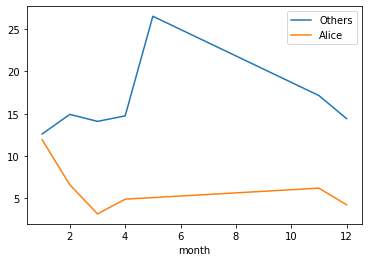

In [43]:
grouped_others_activity.plot(label='Others');
grouped_target_activity.plot(label="Alice")
plt.legend()

# Alice наиболее активна в январе и наименее летом и осенью
# Летом меньше всего активности везде

# В среднем Элис проводит меньше времени на первой странице, чем другие пользователи?
# Верно

In [44]:
def time_between(row, first_site=1, last_site=0):    
    if last_site == 0:
        last_site = row['count_sites']
    if first_site > last_site:
        first_site, last_site = last_site, first_site
        return row['time' + str(last_site)] - row['time' + str(first_site)]
    return row['time' + str(last_site)] - row['time' + str(first_site)]

In [57]:
df_train['time_on_site1'] = df_train.apply(lambda x: time_between(x,1,2).seconds, axis=1)

In [58]:
time_site1_target = df_train[df_train['target'] == 1]['time_on_site1']
time_site1_others = df_train[df_train['target'] == 0]['time_on_site1']

In [65]:
print('Среднее время на первом сайте Alice {}'.format(df_train[df_train['target'] == 1]['time_on_site1'].mean()))
print('Среднее время на первом сайте у остальных {}'.format(df_train[df_train['target'] == 0]['time_on_site1'].mean()))

Среднее время на первом сайте Alice 6.397994768962511
Среднее время на первом сайте у остальных 19.317000532679053


In [66]:
print('Медианное время на первом сайте Alice {}'.format(df_train[df_train['target'] == 1]['time_on_site1'].median()))
print('Медианное время на первом сайте у остальных {}'.format(df_train[df_train['target'] == 0]['time_on_site1'].median()))

Медианное время на первом сайте Alice 1.0
Медианное время на первом сайте у остальных 1.0


# 8) Чему равное медианное значение количества уникальных сайтов в рамках одной сессии обучающей выборки?

In [86]:
def remove_0(num_list):
    num_list = list(num_list)
    if '0' in num_list:
        del num_list[num_list.index('0')]
    return len(num_list)
    

In [89]:
df_train['count_unique_sites_in_session'] = df_train[sites].apply(lambda x: remove_0(x.unique()) , axis=1)

In [92]:
df_train['count_unique_sites_in_session'].median()

6.0

# 9) Чему равное медианное значение времени сессии в обучающей выборке (время посещения последнего сайта примем равным нулю)?

In [96]:
df_train['session_time_sec'].median()

27.0

# 10) В каком месяце доля сессий Элис среди всех наибольшая?

In [100]:
df_train[df_train['target'] == 1]['month'].value_counts(normalize=True,ascending=False)

12    0.265564
2     0.195472
11    0.194166
3     0.173705
4     0.132782
1     0.038311
Name: month, dtype: float64